# Author: MUHAMMAD UBAID FURQAN 
# THE SPARKS FOUNDATION
# Data Science & Business Analytics
# TASK 1 - Prediction using Supervised ML

# Declaring Libaries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# Data Exploration

In [2]:
# Reading the Data 
URL = "http://bit.ly/w-data"
data = pd.read_csv(URL)

In [3]:
# to check the type of data
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
# To check if there is any null value in the Dataset
data.isnull == True

False

#### *There is no null value in the Dataset , so we can now visualize our Data.*


# Data Visualization

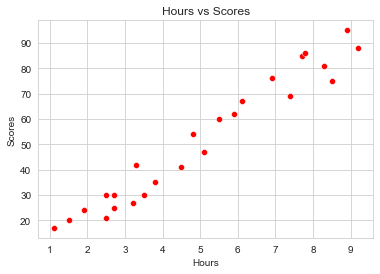

In [6]:
sns.set_style('whitegrid')
plt.title('Hours vs Scores')
sns.scatterplot(y= data['Scores'], x= data['Hours'], color="red")
plt.show()



#### *From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and  scores. Lets plot a regression line to confirm the correlation.*

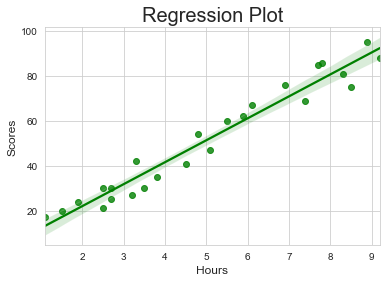

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [7]:
sns.regplot(x= data['Hours'], y= data['Scores'],color="Green")
plt.title('Regression Plot',size=20)
plt.ylabel('Scores', size=12)
plt.xlabel('Hours', size=12)
plt.show()
print(data.corr())

#### *variables are positively correlated.*

# Preparing the Algorithm

In [8]:
X = data.iloc[:, :1].values
Y = data.iloc[:, 1].values

from sklearn.model_selection import train_test_split
xtrain ,xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2, random_state=20,shuffle=True)
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(20, 1) (20,)
(5, 1) (5,)


#### *Here I am using 80% of our dataset for training and 20% of the data for testing.*



# Training the Algorithm

In [9]:
from sklearn.linear_model import LinearRegression
modl = LinearRegression()

In [10]:
modl.fit(xtrain, ytrain)

LinearRegression()

In [11]:
modl.coef_

array([9.67107504])

In [12]:
modl.intercept_

3.3436414413187094

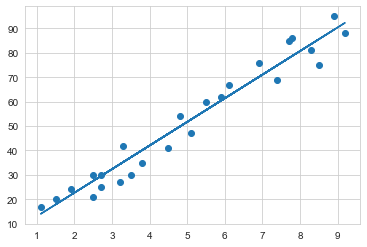

In [13]:
# Plotting the regression line
line = modl.coef_*X+modl.intercept_

# Plotting for the test data
plt.scatter(X, Y)
plt.plot(X, line)
plt.show()

# Making Predictions

In [14]:
ypred = modl.predict(xtest)

In [15]:
np.shape(ypred)
np.shape(ytest)

(5,)

### Comparing Actual vs Predicted Scores ###

In [16]:
data = pd.DataFrame({'Actual': ytest, 'Predicted': ypred})  

In [17]:
data

,Actual,Predicted
0,69,74.909597
1,76,70.074059
2,41,46.863479
3,30,37.192404
4,67,62.337199


# Errors

In [18]:
from sklearn import metrics  
print('Mean Squared Error:', metrics.mean_squared_error(ytest, ypred)) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ytest, ypred)))
print('Mean Absolute Error:', metrics.mean_absolute_error(ytest, ypred))

Mean Squared Error: 35.57857659233009
Root Mean Squared Error: 5.96477800025534
Mean Absolute Error: 5.91084430646127


# Model prepare for testing/Evaluation

### Test with own data
The final step is to evaluate the performance of algorithm.

In [19]:
# You can also test with your own data
hours = [[9.25]]
own_pred = modl.predict(hours)
print("No of Hours = {}".format(hours[0]))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [9.25]
Predicted Score = 92.80108554200021
